# Planning an experiment: Test the quality of a die

An experiment is to be conducted where the proper behavior of a die is checked. The probability of rolling a “one” is measured for checking against the expected probability for a fair die (p = 1/6). The experiment is performed in the following way: the die is rolled N = 10 times and the number of “ones” in these N rolls r is recorded. This counting is repeated K-times. The data that you ﬁnally have available are $r_k$ counts where k = 1,...,K. For a fair die the $r_k$ should obviously follow a binomial distribution $P(r_k|N,p)=\binom{N}{r_k}p^{r_k}(1-p)^{N-r_k}$.

* a: For this set-up, show that the ML estimators for the probability $\hat p$ and its variance Var$[\hat p]$ are $\hat p=\frac{1}{KN}\sum{r_k}$ and Var$[\hat p]\geq \frac{\hat p(1-\hat p)}{KN}$ 

  Hint: An algebra program might be useful for handling some of the algebra. For instance, Mathematica is installed on the machines of the CIP pool. Moreover, there are also R-packages (e.g., _rSymPy_) for symbolic calculation.
  
  The Log-likelihood function is:
  
  $\frac{\partial \ln{(\prod_{k=1}^KP(r_k|N,p))}}{\partial p}=\frac{\partial (\sum_{k=1}^K\ln{P(r_k|N,p)})}{\partial p}=\frac{\partial (\sum_{k=1}^K{\{\ln{(\binom{N}{r_k})}+r_k\ln p+(N-r_k)\ln{(1-p)}\}})}{\partial p}=\sum_{k=1}^K{\{\frac{r_k}{p}-\frac{N-r_k}{1-p}\}}=\frac{1}{p(1-p)}\sum_{k=1}^K{r_k} - \frac{NK}{1-p}=0$ $\Rightarrow \hat p=\frac{1}{KN}\sum{r_k}$



* b: Before actually conducting the experiment, to economize resources, we want to predict how many countings K are actually necessary. Making the assumption that the die is indeed fair: How large has $K = K_1$ to be so that one can constrain $σ_p/p$ to 1%?


* c: Like in previous problem sheets we want to check the performance of the derived estimators by Monte Carlo simulation (in the computer not by hand, of course): perform the whole experiment with a fair die and calculate $p$. Repeat the experiment $10^4$ times with $K_1/4,K_1,4K_1$, and compare the dispersion of p with the ML predictions. Is the Cramér-Rao bound reached?

In [ ]:
# unfinished!!!!!

# Fitting a straight line with known uncertainties in y

The next two exercises are taken from the paper of Hogg et al. “Fitting a straight line to data”. Have perhaps a look at their section 1 for verifying your solutions. Using the linear algebra as given in the lecture, or the formulation in the article by Hogg et al. (in Moodle), ﬁt a straight line $y = mx + b$ to the x, y, and $σ_y$ values for data points 5 through 20 in the table in the ﬁle _hogg table1.txt_ (in Moodle). That is, ignore the ﬁrst four data points, and also ignore the columns for $σ_x$ and Cor[$x,y$].

* a: Write an R-program to calculate the best ﬁtting parameters m and b, their uncertainties, covariance, and $χ^2$ of the ﬁt!


* b: Make a plot showing the points, their uncertainties, and the best-ﬁt line! Hint: error bars can be plotted by using arrows, e.g.: **arrows(x, y-sigy, x, y+sigy, length=0.05, angle=90, code=3)**


* c: Do you have an idea how to illustrate the uncertainty of the location of the ﬁtting line?


* d: Repeat the previous exercise but for all the data points in the table! Is there anything you do not like about the result?


* e: Of course, as statistics oriented programming language R has build in the ﬁtting of linear models with the command lm. Compare lm results to yours. Hint: lm might appear a bit cryptic. Have a look at the example below for inspiration.
**lm(formula = y ~ x + I(x^2), data = table_hogg, subset = (5:20), weights=1.0/table_hogg\$sigy^2)**
  
  Note that the “std. error” in the output of lm() are not the 1σ error bars but auxiliary quantities useful in combination with t-statistics.



In [1]:
data <- read.table("hogg_table1.txt", header=TRUE)
# without first 4 points
x <- data[-(1:4),2]
y <- data[-(1:4),3]
sigy <- data[-(1:4),4]
inv_s_sq <- sigy^(-2)
left <- matrix(c(sum(inv_s_sq),sum(x*inv_s_sq),sum(x*inv_s_sq),sum(x^2*inv_s_sq)), 2, 2)
right <- c(sum(y*inv_s_sq),sum(y*x*inv_s_sq))
res <- solve(left, right)
b <- res[1]
m <- res[2]
cat("the fitting result of m is: ", m, ", of b is", b, "\n")
chi_sq <- sum((y-b-m*x)^2*inv_s_sq)
cat("the chi_square of the fit is: ",chi_sq, "\n" )
cat("the covariance matrix of fitted parameters is the inverse of the normal equations matrix: \n")
lsg <- solve(left, diag(2))
print(lsg)
cat("the variance(uncertainty) of m is: ", lsg[2,2], ", of b is: ", lsg[1,1])

the fitting result of m is:  2.239921 , of b is 34.04773 
the chi_square of the fit is:  18.68077 
the covariance matrix of fitted parameters is the inverse of the normal equations matrix: 
           [,1]        [,2]
[1,] 332.922601 -1.88954491
[2,]  -1.889545  0.01161663
the variance(uncertainty) of m is:  0.01161663 , of b is:  332.9226

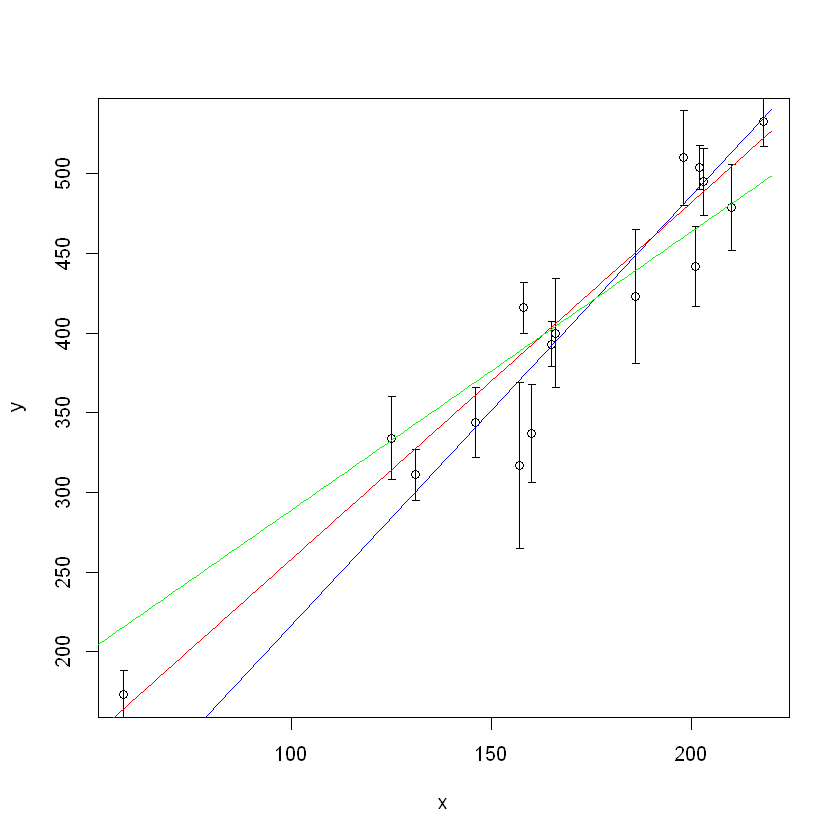

The possible location of the fitting line is the region between the green and blue lines. 


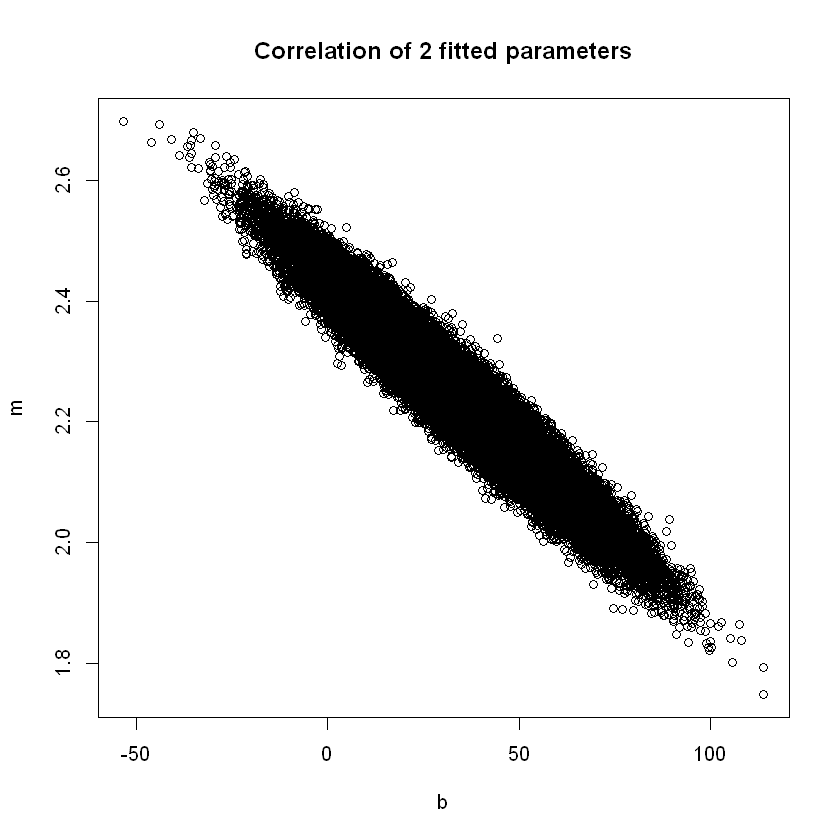

In [2]:
# plot
plot(x, y)
arrows(x, y-sigy, x, y+sigy, length=0.03, angle=90, code=3)
t <- seq(40, 220, 1)
lines(t, b + m*t, col="red")
# uncertainty of the location of the fitting line
# m, b is correalted, so we use multivariate normal distribution for the two parameters
library(MASS)
paras <- mvrnorm(10^5, res, lsg)
# It's better to get random vector from paras and plot the lines
min1 <- min(paras[,1])
min2 <- paras[which(paras[,1]==min1),2]
lines(t, min1 + min2*t, col="blue")
max1 <- max(paras[,1])
max2 <- paras[which(paras[,1]==max1),2]
lines(t, max1 + max2*t, col="green")
plot(paras, xlab="b", ylab="m", main="Correlation of 2 fitted parameters")
cat("The possible location of the fitting line is the region between the green and blue lines. \n")
# alternativ, calculate sigma_y^2 = gradient_{theta,y}^T*Cov(theta^T, theta)*gradient_{theta,y}

In [3]:
# with first 4 points
x <- data[,2]
y <- data[,3]
sigy <- data[,4]
inv_s_sq <- sigy^(-2)
left <- matrix(c(sum(inv_s_sq),sum(x*inv_s_sq),sum(x*inv_s_sq),sum(x^2*inv_s_sq)), 2, 2)
right <- c(sum(y*inv_s_sq),sum(y*x*inv_s_sq))
res <- solve(left, right)
b <- res[1]
m <- res[2]
cat("the fitting result of m is: ", m, ", of b is", b, "\n")
chi_sq <- sum((y-b-m*x)^2*inv_s_sq)
cat("the chi_square of the fit is: ",chi_sq, "\n" )
cat("the covariance matrix of fitted parameters is the inverse of the normal equations matrix: \n")
lsg <- solve(left, diag(2))
print(lsg)
cat("the variance(uncertainty) of m is: ", lsg[2,2], ", of b is: ", lsg[1,1])

the fitting result of m is:  1.076748 , of b is 213.2735 
the chi_square of the fit is:  289.9637 
the covariance matrix of fitted parameters is the inverse of the normal equations matrix: 
           [,1]        [,2]
[1,] 207.188189 -1.05427206
[2,]  -1.054272  0.00599181
the variance(uncertainty) of m is:  0.00599181 , of b is:  207.1882

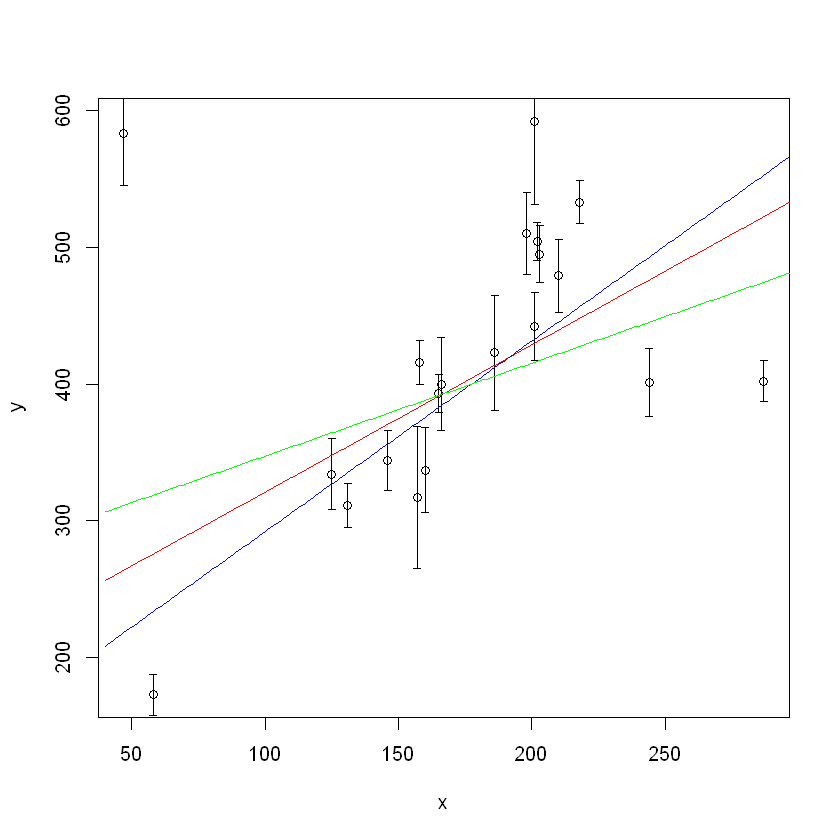

The possible location of the fitting line is the region between the green and blue lines. 
Apparently the result shows us that the outliers have big influence on fitted parameters, which makes the chi_square 
very large and thus the fit seem to be very bad. 


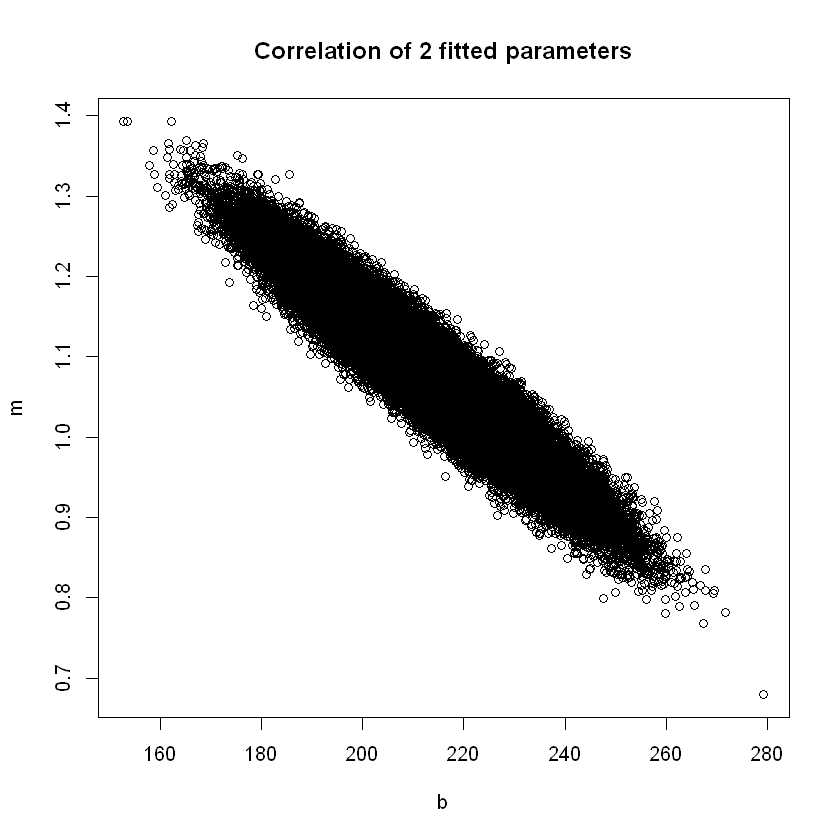

In [4]:
# plot
plot(x, y)
arrows(x, y-sigy, x, y+sigy, length=0.03, angle=90, code=3)
t <- seq(40, 300, 1)
lines(t, b + m*t, col="red")
# uncertainty of the location of the fitting line
# m, b is correalted, so we use multivariate normal distribution for the two parameters
library(MASS)
paras <- mvrnorm(10^5, res, lsg)
min1 <- min(paras[,1])
min2 <- paras[which(paras[,1]==min1),2]
lines(t, min1 + min2*t, col="blue")
max1 <- max(paras[,1])
max2 <- paras[which(paras[,1]==max1),2]
lines(t, max1 + max2*t, col="green")
plot(paras, xlab="b", ylab="m", main="Correlation of 2 fitted parameters")
cat("The possible location of the fitting line is the region between the green and blue lines. \n")
cat("Apparently the result shows us that the outliers have big influence on fitted parameters, which makes the chi_square 
very large and thus the fit seem to be very bad. \n")

In [5]:
cat("Now we compare our fitting result with the fit model using functions in r: \n")
rres <- lm(formula = y ~ x, data = data, subset = (5:20), weights=1.0/sigy^2)
# formula y ~ x correspoding model y = b + m*x
summary(rres)

Now we compare our fitting result with the fit model using functions in r: 



Call:
lm(formula = y ~ x, data = data, subset = (5:20), weights = 1/sigy^2)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.7882 -0.9639 -0.4158  0.6911  1.7528 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.0477    21.0768   1.615    0.129    
x             2.2399     0.1245  17.991 4.49e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.155 on 14 degrees of freedom
Multiple R-squared:  0.9585,	Adjusted R-squared:  0.9556 
F-statistic: 323.7 on 1 and 14 DF,  p-value: 4.493e-11


# Fitting a quadratic model

Generalize the method of this Section to ﬁt a general quadratic (second order) relationship $g(x) = qx^2 + mx + b$. Then re-do the ﬁtting for the case without outliers. What is the best quadratic relationship?

With quadratic relationship the Log-likelihood function is then:
$$l(q,b,m)=\sum_{i=1}^N\{-\ln{s_i}-\ln{\sqrt{2\pi}}-\frac{1}{2}\frac{(y_i-qx_i^2-mx_i-b)^2}{s_i^2}\}$$.

Thus the partial derivatives are:
$$\frac{\partial l}{\partial b}=\sum_{i=1}^N(y_i-qx_i^2-mx_i-b)s_i^{-2}$$
$$\frac{\partial l}{\partial m}=\sum_{i=1}^N(y_i-qx_i^2-mx_i-b)x_is_i^{-2}$$
$$\frac{\partial l}{\partial q}=\sum_{i=1}^N(y_i-qx_i^2-mx_i-b)x_i^2s_i^{-2}$$

So we get a 3\*3 linear system of equations
$$
\begin{pmatrix} 
  \sum_i{s_i^{-2}} & \sum_i{x_i s_i^{-2}} & \sum_i{x_i^2 s_i^{-2}}\\ 
  \sum_i{x_i s_i^{-2}} & \sum_i{x_i^2 s_i^{-2}} & \sum_i{x_i^3 s_i^{-2}}\\
  \sum_i{x_i^2 s_i^{-2}} & \sum_i{x_i^3 s_i^{-2}} & \sum_i{x_i^4 s_i^{-2}}\\
\end{pmatrix}
\begin{pmatrix} 
  b\\ 
  m\\
  q
\end{pmatrix}
=
\begin{pmatrix} 
  \sum_i{y_i s_i^{-2}}\\ 
  \sum_i{y_i x_i s_i^{-2}}\\
  \sum_i{y_i x_i^2 s_i^{-2}}\\
\end{pmatrix}
$$

And the following steps are pricinpally the same. 

In [6]:
# with 4 outliers
left <- matrix(c(sum(inv_s_sq),sum(x*inv_s_sq),sum(x^2*inv_s_sq),sum(x*inv_s_sq),sum(x^2*inv_s_sq),sum(x^3*inv_s_sq),
                 sum(x^2*inv_s_sq),sum(x^3*inv_s_sq),sum(x^4*inv_s_sq)), 3, 3)
right <- c(sum(y*inv_s_sq),sum(y*x*inv_s_sq), sum(y*x^2*inv_s_sq))
res <- solve(left, right)
b <- res[1]
m <- res[2]
q <- res[3]
cat("the fitting result of m is: ", m, ", of b is", b, "\n", ", of q is", q, "\n" )
chi_sq <- sum((y-b-m*x-q*x^2)^2*inv_s_sq)
cat("the chi_square of the fit is: ",chi_sq, "\n" )
cat("the covariance matrix of fitted parameters is the inverse of the normal equations matrix: \n")
lsg <- solve(left, diag(3))
print(lsg)
cat("the variance(uncertainty) of m is: ", lsg[2,2], ", of b is: ", lsg[1,1], ", of q is: ", lsg[3,3])

the fitting result of m is:  3.715966 , of b is 18.84583 
 , of q is -0.007806819 
the chi_square of the fit is:  218.49 
the covariance matrix of fitted parameters is the inverse of the normal equations matrix: 
             [,1]          [,2]          [,3]
[1,] 736.08377181 -8.2336570507  2.123665e-02
[2,]  -8.23365705  0.1034469043 -2.882726e-04
[3,]   0.02123665 -0.0002882726  8.527114e-07
the variance(uncertainty) of m is:  0.1034469 , of b is:  736.0838 , of q is:  8.527114e-07

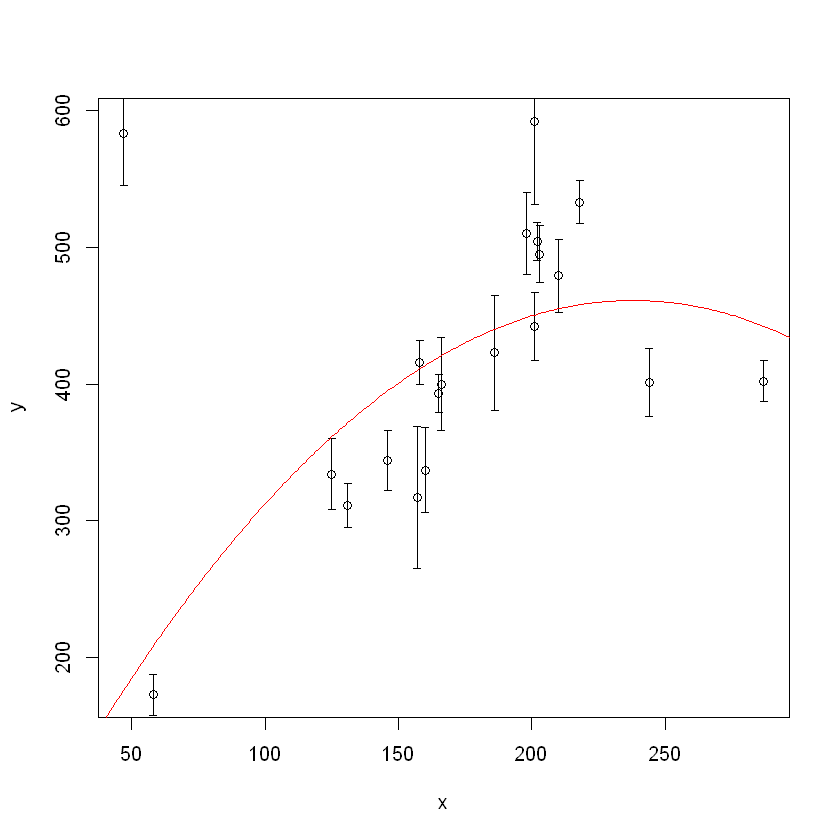

In [7]:
# plot
plot(x, y)
arrows(x, y-sigy, x, y+sigy, length=0.03, angle=90, code=3)
t <- seq(40, 300, 1)
lines(t, b + m*t+q*t^2, col="red")

In [8]:
# without 4 outliers
x <- data[-(1:4),2]
y <- data[-(1:4),3]
sigy <- data[-(1:4),4]
inv_s_sq <- sigy^(-2)
left <- matrix(c(sum(inv_s_sq),sum(x*inv_s_sq),sum(x^2*inv_s_sq),sum(x*inv_s_sq),sum(x^2*inv_s_sq),sum(x^3*inv_s_sq),
                 sum(x^2*inv_s_sq),sum(x^3*inv_s_sq),sum(x^4*inv_s_sq)), 3, 3)
right <- c(sum(y*inv_s_sq),sum(y*x*inv_s_sq), sum(y*x^2*inv_s_sq))
res <- solve(left, right)
b <- res[1]
m <- res[2]
q <- res[3]
cat("the fitting result of m is: ", m, ", of b is", b, "\n", ", of q is", q, "\n" )
chi_sq <- sum((y-b-m*x-q*x^2)^2*inv_s_sq)
cat("the chi_square of the fit is: ",chi_sq, "\n" )
cat("the covariance matrix of fitted parameters is the inverse of the normal equations matrix: \n")
lsg <- solve(left, diag(3))
print(lsg)
cat("the variance(uncertainty) of m is: ", lsg[2,2], ", of b is: ", lsg[1,1], ", of q is: ", lsg[3,3])

the fitting result of m is:  1.59605 , of b is 72.89463 
 , of q is 0.002298888 
the chi_square of the fit is:  17.40317 
the covariance matrix of fitted parameters is the inverse of the normal equations matrix: 
              [,1]         [,2]          [,3]
[1,] 1514.10912766 -21.46719570  6.990046e-02
[2,]  -21.46719570   0.33610764 -1.158570e-03
[3,]    0.06990046  -0.00115857  4.136581e-06
the variance(uncertainty) of m is:  0.3361076 , of b is:  1514.109 , of q is:  4.136581e-06

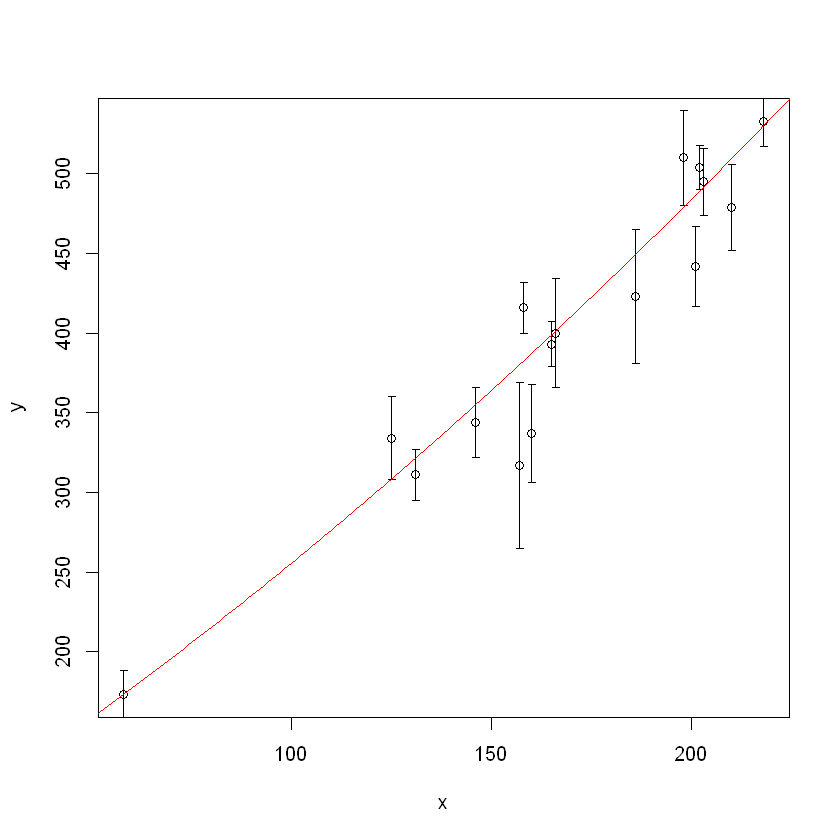

In [9]:
# plot
plot(x, y)
arrows(x, y-sigy, x, y+sigy, length=0.03, angle=90, code=3)
t <- seq(40, 240, 1)
lines(t, b + m*t+q*t^2, col="red")

# further study: try higher order, does that make sense? -> small chi^2, but we need also simplicity
# add one free parameter when fitting -> reduct chi^2 by 1 
# if use orthogonal polynorms -> they are mutually independent , thus easier to add order